In [28]:
import pandas as pd 
from arcgis.features import FeatureLayer

In [29]:
url = 'https://services1.arcgis.com/79kfd2K6fskCAkyg/arcgis/rest/services/FoodServiceData/FeatureServer/0'

batch_size = 1000  # Number of records to retrieve per batch
offset = 0  # Initial offset value
data_list = []
# ​Create the feature layer object
feature_layer = FeatureLayer(url)

while True:
    # Query the feature layer with pagination
    query_result = feature_layer.query(where='1=1', out_fields='*', return_geometry=False, result_offset=offset, result_record_count=batch_size)
    
    # Retrieve the features from the query result
    features = query_result.features
    
    # Process the data for the current batch
    for feature in features:
        data_list.append(feature.attributes)
    
    # Break the loop if the response is empty or the desired number of records is reached
    if len(features) == 0 or len(data_list) >= 1000:
        break
    
    # Increment the offset by the batch size
    offset += batch_size
# Create a DataFrame from the data list
df = pd.DataFrame(data_list)

In [30]:
df.head(2)

,EstablishmentID,InspectionID,Ins_TypeDesc,EstablishmentName,PlaceName,Address,Address2,City,State,Zip,TypeDescription,InspectionDate,score,Grade,NameSearch,Intersection,ObjectId
0,29956,1684470,REGULAR,CVS #6211,None,3721 LEXINGTON RD,None,LOUISVILLE,KY,40207,PRE-PACKAGED RETAIL,2022-07-06 00:00:00,100,None,CVS #6211,None,1
1,29967,1699737,REGULAR,NEIGHBORHOOD FOOD MART,None,542 LAMPTON ST,None,LOUISVILLE,KY,40203,SUPERMARKET WITH PROCESSING,2022-09-07 00:00:00,97,None,NEIGHBORHOOD FOOD MART,None,2


In [31]:
df.shape

(11230, 17)

In [35]:
df['InspectionDate'] = pd.to_datetime(df['InspectionDate'])
df.head(2)

,EstablishmentID,InspectionID,Ins_TypeDesc,EstablishmentName,PlaceName,Address,Address2,City,State,Zip,TypeDescription,InspectionDate,score,Grade,NameSearch,Intersection,ObjectId
4802,98505,1749114,REGULAR,MI SUENO RESTAURANT,None,3425 BARDSTOWN RD,None,LOUISVILLE,KY,40218,FOOD SERVICE,2023-04-18,70,C,MI SUENO RESTAURANT,None,4803
10802,118055,1748425,REGULAR,DAISUKI SUSHI,None,1604 BARDSTOWN RD,None,LOUISVILLE,KY,40205,FOOD SERVICE,2023-04-14,71,C,DAISUKI SUSHI,None,10803


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11230 entries, 0 to 11229
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   EstablishmentID    11230 non-null  int64         
 1   InspectionID       11230 non-null  int64         
 2   Ins_TypeDesc       11230 non-null  object        
 3   EstablishmentName  11230 non-null  object        
 4   PlaceName          0 non-null      object        
 5   Address            9924 non-null   object        
 6   Address2           0 non-null      object        
 7   City               11230 non-null  object        
 8   State              11230 non-null  object        
 9   Zip                11230 non-null  int64         
 10  TypeDescription    11230 non-null  object        
 11  InspectionDate     11230 non-null  datetime64[ns]
 12  score              11230 non-null  int64         
 13  Grade              7219 non-null   object        
 14  NameSe

Remove the dup

In [36]:
df = df[(df['score'] != 0)]
df = df.sort_values(by='score', ascending=True)
# df = df.reset_index()
df

,EstablishmentID,InspectionID,Ins_TypeDesc,EstablishmentName,PlaceName,Address,Address2,City,State,Zip,TypeDescription,InspectionDate,score,Grade,NameSearch,Intersection,ObjectId
4802,98505,1749114,REGULAR,MI SUENO RESTAURANT,None,3425 BARDSTOWN RD,None,LOUISVILLE,KY,40218,FOOD SERVICE,2023-04-18,70,C,MI SUENO RESTAURANT,None,4803
10802,118055,1748425,REGULAR,DAISUKI SUSHI,None,1604 BARDSTOWN RD,None,LOUISVILLE,KY,40205,FOOD SERVICE,2023-04-14,71,C,DAISUKI SUSHI,None,10803
5048,99781,1725518,REGULAR,HAPPY CHINA,None,9128 TAYLORSVILLE RD,None,LOUISVILLE,KY,40299,FOOD SERVICE,2022-12-22,72,C,HAPPY CHINA,None,5049
9915,115438,1725737,FOLLOWUP,EXPRESSWAY FOOD MART,None,1420 W BROADWAY,None,LOUISVILLE,KY,40203,"RETAIL-FOOD 10,000 SQ FT OR LESS",2022-12-27,73,C,EXPRESSWAY FOOD MART,None,9916
6907,107689,1704587,REGULAR,BEST WESTERN,None,4110 DIXIE HWY,None,LOUISVILLE,KY,40216,FOOD SERVICE,2022-09-28,74,C,BEST WESTERN,None,6908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,44877,1750751,REGULAR,PATCHES PLAYMATES,None,10414 MILLER LN,None,LOUISVILLE,KY,40272,FOOD SERVICE (DAY CARE / CHILD CARE CENTER,2023-04-25,100,A,PATCHES PLAYMATES,None,1329
1327,52417,1753695,REGULAR,STEVIE RAY'S BLUES CLUB,None,230 E MAIN ST,None,LOUISVILLE,KY,40202,FOOD SERVICE,2023-05-03,100,A,STEVIE RAY'S BLUES CLUB,None,1328
9900,115681,1680144,OTHER,SANKALP LOUISVILLE,None,9008 TAYLORSVILLE RD,None,LOUISVILLE,KY,40299,FOOD SERVICE,2022-06-03,100,None,SANKALP LOUISVILLE,None,9901
944,34685,1734036,REGULAR,ROBBEN'S ROOST,None,5906 SIX MILE LN,None,LOUISVILLE,KY,40220,FOOD SERVICE,2023-02-04,100,A,ROBBEN'S ROOST,None,945


In [38]:
df.value_counts('score')

score
100    3475
99     1788
98     1503
97     1147
96      773
95      554
94      321
93      182
92      115
91       78
90       58
89       30
88       23
86       17
87       17
85       17
83       16
84       12
82       11
81        9
80        4
78        4
74        4
75        3
76        2
71        1
79        1
77        1
73        1
72        1
70        1
dtype: int64

<AxesSubplot:title={'center':'Lowest Restaurant Grades of the day'}, ylabel='score'>

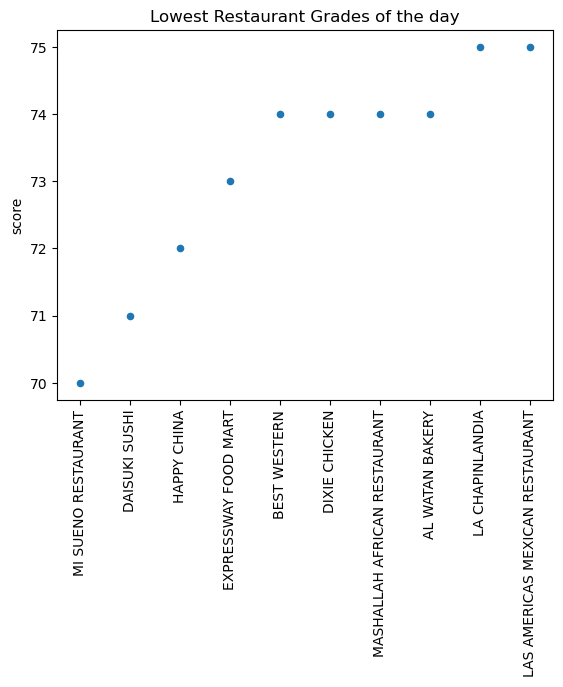

In [40]:
df = df[0:10]
df.plot.scatter( title = "Lowest Restaurant Grades of the day",x = 'NameSearch', y = 'score', rot = 'vertical', xlabel = "",)